In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
from numpy import random as r

from pylab import *
from IPython.core.pylabtools import figsize

import seaborn as sns
import matplotlib.cm as cm

import sys
sys.path.insert(0, '../../../utils')
import splicing_utils as spu
import single_cell_plots as scp
from single_cell_plots import *

import matplotlib as mpl
import numpy as np
from matplotlib import pyplot as plt

mpl.rcParams["mathtext.fontset"] = "stix"
mpl.rcParams['pdf.fonttype'] = 42

In [2]:
import importlib
importlib.reload(scp)
importlib.reload(spu)
mpl.rcParams["mathtext.fontset"] = "stix"
mpl.rcParams['pdf.fonttype'] = 42

# Simulations with unimodal underlying $\Psi$

To get the tables in sim1, run the Rscript sim_realistic_data.R

In [3]:
# gene_len = np.array([int(x.rstrip()) for x in open('sim0/gene_length.txt').readlines()])

# uni_true_counts, uni_true_psi = spu.process_symsim_true('sim0/unimodal_true.tab', n=300, g=500)
# uni_2_counts, uni_2_psi = spu.process_symsim_observed('sim0/unimodal_observed_2.tab', gene_len, n=300, g=500)
# uni_1_counts, uni_1_psi = spu.process_symsim_observed('sim0/unimodal_observed_1.tab', gene_len, n=300, g=500)
# uni_05_counts, uni_05_psi = spu.process_symsim_observed('sim0/unimodal_observed_05.tab', gene_len, n=300, g=500)
# uni_02_counts, uni_02_psi = spu.process_symsim_observed('sim0/unimodal_observed_02.tab', gene_len, n=300, g=500)
# uni_01_counts, uni_01_psi = spu.process_symsim_observed('sim0/unimodal_observed_01.tab', gene_len, n=300, g=500)


In [3]:
gene_len = np.array([int(x.rstrip()) for x in open('sim1/gene_length.txt').readlines()])

uni_true_counts, uni_true_psi = spu.process_symsim_true('sim1/unimodal_true.tab', n=300, g=1500)
uni_9_counts, uni_9_psi = spu.process_symsim_observed('sim1/unimodal_observed_9.tab', gene_len, n=300, g=1500)
uni_7_counts, uni_7_psi = spu.process_symsim_observed('sim1/unimodal_observed_7.tab', gene_len, n=300, g=1500)
uni_5_counts, uni_5_psi = spu.process_symsim_observed('sim1/unimodal_observed_5.tab', gene_len, n=300, g=1500)
uni_2_counts, uni_2_psi = spu.process_symsim_observed('sim1/unimodal_observed_2.tab', gene_len, n=300, g=1500)
uni_1_counts, uni_1_psi = spu.process_symsim_observed('sim1/unimodal_observed_1.tab', gene_len, n=300, g=1500)
uni_05_counts, uni_05_psi = spu.process_symsim_observed('sim1/unimodal_observed_05.tab', gene_len, n=300, g=1500)
uni_02_counts, uni_02_psi = spu.process_symsim_observed('sim1/unimodal_observed_02.tab', gene_len, n=300, g=1500)
uni_01_counts, uni_01_psi = spu.process_symsim_observed('sim1/unimodal_observed_01.tab', gene_len, n=300, g=1500)


In [19]:
uni_01_counts_total = pd.read_csv('sim1/unimodal_observed_01.tab', sep='\t', names=['cell_' + str(x) for x in range(1, 301)])
uni_02_counts_total = pd.read_csv('sim1/unimodal_observed_02.tab', sep='\t', names=['cell_' + str(x) for x in range(1, 301)])
uni_05_counts_total = pd.read_csv('sim1/unimodal_observed_05.tab', sep='\t', names=['cell_' + str(x) for x in range(1, 301)])
uni_1_counts_total = pd.read_csv('sim1/unimodal_observed_1.tab', sep='\t', names=['cell_' + str(x) for x in range(1, 301)])
uni_2_counts_total = pd.read_csv('sim1/unimodal_observed_2.tab', sep='\t', names=['cell_' + str(x) for x in range(1, 301)])
uni_5_counts_total = pd.read_csv('sim1/unimodal_observed_5.tab', sep='\t', names=['cell_' + str(x) for x in range(1, 301)])
uni_7_counts_total = pd.read_csv('sim1/unimodal_observed_7.tab', sep='\t', names=['cell_' + str(x) for x in range(1, 301)])
uni_9_counts_total = pd.read_csv('sim1/unimodal_observed_9.tab', sep='\t', names=['cell_' + str(x) for x in range(1, 301)])

Text(0, 0.5, 'Reads per cell')

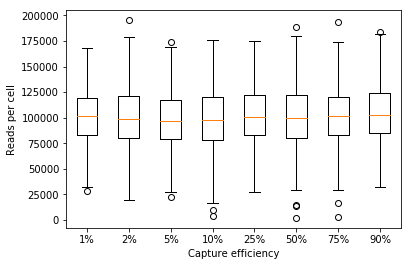

In [23]:
plt.boxplot([uni_01_counts_total.sum(), uni_02_counts_total.sum(), uni_05_counts_total.sum(), uni_1_counts_total.sum(), 
             uni_2_counts_total.sum(), uni_5_counts_total.sum(), uni_7_counts_total.sum(), uni_9_counts_total.sum()])
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8], ['1%', '2%', '5%', '10%', '25%', '50%', '75%', '90%'])
plt.xlabel('Capture efficiency')
plt.ylabel('Reads per cell')

In [5]:
sort_uni_expression = uni_true_counts.mean(axis=1).sort_values().index
bins_uni_true = scp.get_bins_table(uni_true_psi, uni_true_counts)
bins_uni_2 = scp.get_bins_table(uni_2_psi, uni_true_counts)
bins_uni_1 = scp.get_bins_table(uni_1_psi, uni_true_counts)
bins_uni_05 = scp.get_bins_table(uni_05_psi, uni_true_counts)
bins_uni_02 = scp.get_bins_table(uni_02_psi, uni_true_counts)
bins_uni_01 = scp.get_bins_table(uni_01_psi, uni_true_counts)

### All simulated exons

In [6]:
# import importlib
# importlib.reload(scp)
# importlib.reload(spu)
# sns.reset_orig()
# mpl.rcParams["mathtext.fontset"] = "stix"
hist_list = [bins_uni_true[0], bins_uni_2[0], bins_uni_1[0], bins_uni_05[0], bins_uni_02[0], bins_uni_01[0]]
dset_name_list = ["True $\Psi$", "Capture = 0.2", "Capture = 0.1", "Capture = 0.05", "Capture = 0.02", "Capture = 0.01"]

# scp.plot_histograms(hist_list, dset_name_list, fig_len=10, fig_height = 10, ypos1=0.025, ypos2 = 0.625,
#                     plot_dir = 'plots/', plot_name = 'figure_2_unimodal_all_exons',
#                     plot_title = "", 
#                     ylab='Simulated exons', ls=12, sk=1.65, tfs=14, name_size=15)

### Intermediate simulated exons

/mnt/lareaulab/cfbuenabadn/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


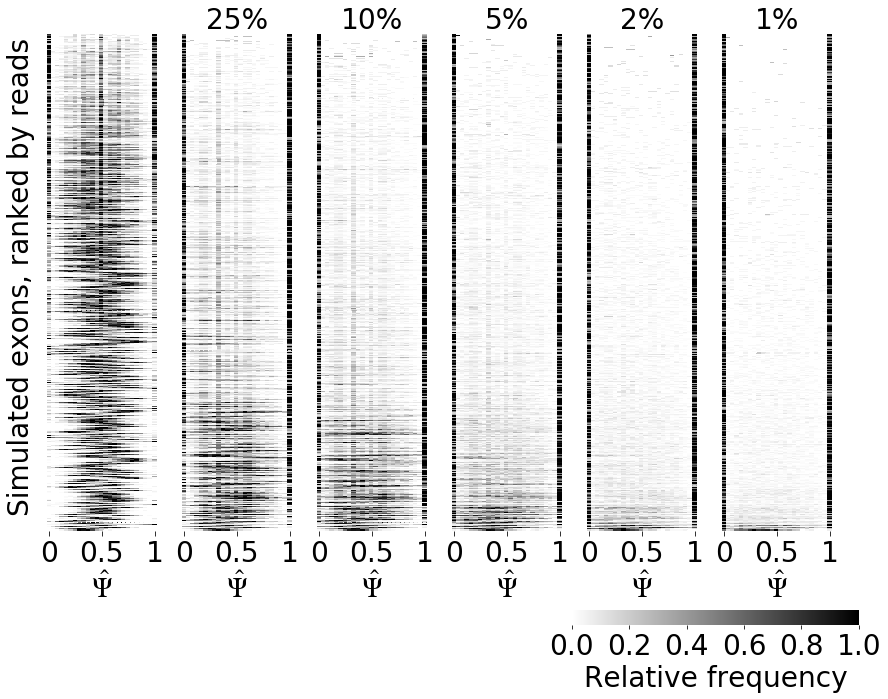

In [7]:
# import importlib
# importlib.reload(scp)
# importlib.reload(spu)
# sns.reset_orig()
# mpl.rcParams["mathtext.fontset"] = "stix"
hist_list = [bins_uni_true[1],  bins_uni_2[1], bins_uni_1[1], bins_uni_05[1], bins_uni_02[1], bins_uni_01[1]]
dset_name_list = ["", "25%", "10%", "5%", "2%", "1%"]

scp.plot_histograms(hist_list, dset_name_list, fig_len=10, fig_height = 12, ypos1=0.025, ypos2 = 0.625,
                    plot_dir = 'plots/', plot_name = 'figure_2_unimodal_intermediate_biases',
                    plot_title = "", 
                    ylab='Simulated exons, ranked by reads', ls=28, sk=3, tfs=20, name_size=28)

In [76]:
bins_uni_true[1].tail()

,0.0,0.04,0.08,0.12,0.16,0.2,0.24,0.28,0.32,0.36,...,0.6,0.64,0.68,0.72,0.76,0.8,0.84,0.88,0.92,1.0
30,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014925,0.014925,0.059701,0.194030,...,0.313433,0.014925,0.029851,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
314,0.017544,0.157895,0.368421,0.631579,0.842105,1.000000,0.807018,0.649123,0.456140,0.263158,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
444,0.000000,0.000000,0.000000,0.000000,0.000000,0.021739,0.000000,0.000000,0.021739,0.195652,...,1.000000,0.847826,0.673913,0.347826,0.065217,0.130435,0.0,0.0,0.0,0.0
85,0.000000,0.022727,0.159091,0.454545,0.318182,0.613636,0.704545,1.000000,0.977273,0.545455,...,0.045455,0.068182,0.000000,0.022727,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.033333,0.116667,0.200000,0.400000,1.000000,0.933333,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


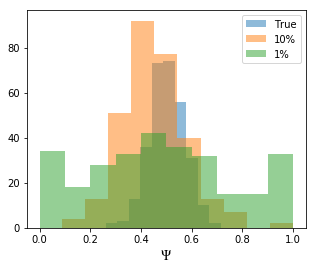

In [7]:
figsize(5, 4)
plt.hist(uni_true_psi.loc[30], alpha=0.5, label='True')
plt.hist(uni_1_psi.loc[30], alpha=0.5, label='10%')
plt.hist(uni_01_psi.loc[30], alpha=0.5, label='1%')
plt.xlabel('$\Psi$', fontsize=14)
plt.legend()

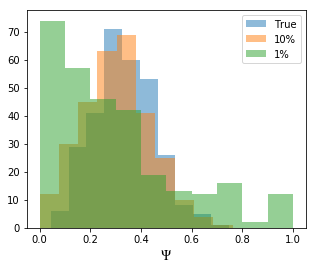

In [8]:
figsize(5, 4)
plt.hist(uni_true_psi.loc[85], alpha=0.5, label='True')
plt.hist(uni_1_psi.loc[85], alpha=0.5, label='10%')
plt.hist(uni_01_psi.loc[85], alpha=0.5, label='1%')
plt.xlabel('$\Psi$', fontsize=14)
plt.legend()

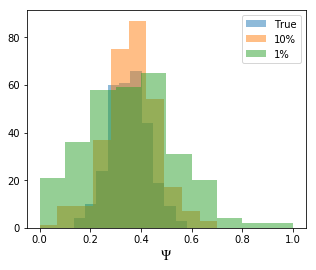

In [9]:
figsize(5, 4)
plt.hist(uni_true_psi.loc[4], alpha=0.5, label='True')
plt.hist(uni_1_psi.loc[4], alpha=0.5, label='10%')
plt.hist(uni_01_psi.loc[4], alpha=0.5, label='1%')
plt.xlabel('$\Psi$', fontsize=14)
plt.legend()

In [ ]:
sort_uni_expression = runi_true_counts.mean(axis=1).sort_values().index
bins_uni_true = scp.get_bins_table(runi_true_psi, runi_true_counts)
bins_uni_2 = scp.get_bins_table(runi_2_psi, runi_true_counts)
bins_uni_1 = scp.get_bins_table(runi_1_psi, runi_true_counts)
bins_uni_05 = scp.get_bins_table(runi_05_psi, runi_true_counts)
bins_uni_02 = scp.get_bins_table(runi_02_psi, runi_true_counts)
bins_uni_01 = scp.get_bins_table(runi_01_psi, runi_true_counts)


# import importlib
# importlib.reload(scp)
# importlib.reload(spu)
# sns.reset_orig()
# mpl.rcParams["mathtext.fontset"] = "stix"
hist_list = [bins_uni_true[0], bins_uni_2[0], bins_uni_1[0], bins_uni_05[0], bins_uni_02[0], bins_uni_01[0]]
dset_name_list = ["True $\Psi$", "Capture = 0.2", "Capture = 0.1", "Capture = 0.05", "Capture = 0.02", "Capture = 0.01"]

# scp.plot_histograms(hist_list, dset_name_list, fig_len=10, fig_height = 10, ypos1=0.025, ypos2 = 0.625,
#                     plot_dir = 'plots/', plot_name = 'figure_2_unimodal_all_exons',
#                     plot_title = "", 
#                     ylab='Simulated exons', ls=12, sk=1.65, tfs=14, name_size=15)


# import importlib
# importlib.reload(scp)
# importlib.reload(spu)
# sns.reset_orig()
# mpl.rcParams["mathtext.fontset"] = "stix"
hist_list = [bins_uni_true[1],  bins_uni_2[1], bins_uni_1[1], bins_uni_05[1], bins_uni_02[1], bins_uni_01[1]]
dset_name_list = ["", "25%", "10%", "5%", "2%", "1%"]

scp.plot_histograms(hist_list, dset_name_list, fig_len=10, fig_height = 12, ypos1=0.025, ypos2 = 0.625,
                    plot_dir = 'plots/', plot_name = 'figure_2_unimodal_intermediate_biases',
                    plot_title = "", 
                    ylab='Simulated exons, ranked by reads', ls=28, sk=3, tfs=20, name_size=28)

In [69]:
gene_len = np.array([int(x.rstrip()) for x in open('sim0/gene_length.txt').readlines()])

uni_true_counts, uni_true_psi = spu.process_symsim_true('sim0/unimodal_true.tab', n=300)
uni_2_counts, uni_2_psi = spu.process_symsim_observed('sim0/unimodal_observed_2.tab', gene_len, n=300)
# uni_1_counts, uni_1_psi = spu.process_symsim_observed('sim0/unimodal_observed_1.tab', gene_len, n=300)
# uni_05_counts, uni_05_psi = spu.process_symsim_observed('sim0/unimodal_observed_05.tab', gene_len, n=300)
# uni_02_counts, uni_02_psi = spu.process_symsim_observed('sim0/unimodal_observed_02.tab', gene_len, n=300)
# uni_01_counts, uni_01_psi = spu.process_symsim_observed('sim0/unimodal_observed_01.tab', gene_len, n=300)


In [74]:
gene_len = np.array([int(x.rstrip()) for x in open('sim_tables8/gene_length.sim_1.txt').readlines()])
  

uni_true_counts, uni_true_psi = spu.process_symsim_true('sim_tables8/true_counts.sim_1_cap_0.1.tab', n=300)
uni_2_counts, uni_2_psi = spu.process_symsim_observed('sim_tables8/observed_counts.sim_1_cap_0.1.tab', gene_len, n=300)
# uni_1_counts, uni_1_psi = spu.process_symsim_observed('sim0/unimodal_observed_1.tab', gene_len, n=300)
# uni_05_counts, uni_05_psi = spu.process_symsim_observed('sim0/unimodal_observed_05.tab', gene_len, n=300)
# uni_02_counts, uni_02_psi = spu.process_symsim_observed('sim0/unimodal_observed_02.tab', gene_len, n=300)
# uni_01_counts, uni_01_psi = spu.process_symsim_observed('sim0/unimodal_observed_01.tab', gene_len, n=300)


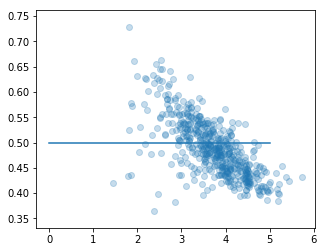

In [6]:
figsize(5, 4)
plt.scatter(np.log10(uni_2_counts.sum(axis=1)+1), uni_2_psi.mean(axis=1), alpha=0.25)
plt.plot([0, 5], [0.5, 0.5])

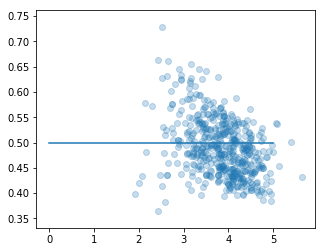

In [7]:
figsize(5, 4)
plt.scatter(np.log10(uni_true_counts.sum(axis=1)+1), uni_2_psi.mean(axis=1), alpha=0.25)
plt.plot([0, 5], [0.5, 0.5])

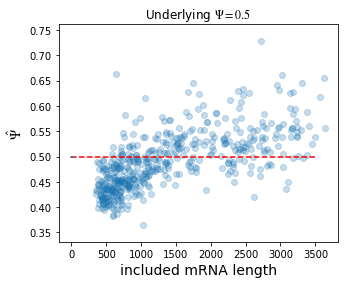

In [8]:
figsize(5, 4)
plt.scatter(np.array(gene_len[:500]), uni_2_psi.mean(axis=1), alpha=0.25)
plt.title('Underlying $\Psi = 0.5$')
plt.xlabel('included mRNA length', fontsize=14)
plt.ylabel(r'$\hat{\Psi}$', fontsize=14)
plt.plot([0, 3500], [0.5, 0.5], c='red', linestyle='--')
plt.plot([0, 5], [0.5, 0.5])

In [66]:
uni_2_psi.loc[0].mean()

0.5896896962686435

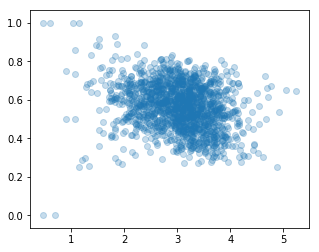

In [46]:
figsize(5, 4)
plt.scatter(np.log10(runi_2_counts.sum(axis=1)+1), runi_2_psi.mean(axis=1), alpha=0.25)

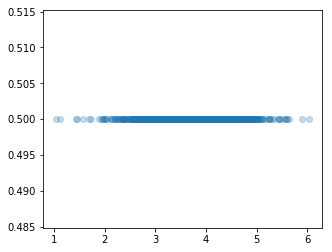

In [47]:
figsize(5, 4)
plt.scatter(np.log10(uni_true_counts.sum(axis=1)+1), uni_true_psi.mean(axis=1), alpha=0.25)

In [28]:
uni_2_psi.columns = uni_true_psi.columns

In [36]:
(300-uni_2_psi.isna().sum(axis=1)).min()

0

(array([ 74., 255., 586., 560.,  23.,   0.,   0.,   0.,   0.,   1.]),
 array([0.00799612, 0.05821692, 0.10843771, 0.15865851, 0.20887931,
        0.2591001 , 0.3093209 , 0.35954169, 0.40976249, 0.45998329,
        0.51020408]),
 <a list of 10 Patch objects>)

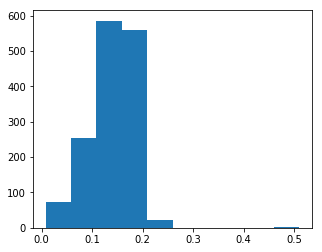

In [38]:
plt.hist(((uni_true_psi - uni_2_psi)**2).sum(axis=1)/(300-uni_2_psi.isna().sum(axis=1)))

(array([ 3.,  1.,  2.,  2.,  0.,  2.,  6.,  4.,  4.,  7., 14.,  9., 21.,
        27., 27., 34., 34., 59., 59., 60., 44., 30., 25.,  9.,  3.,  6.,
         1.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  2.]),
 array([0.        , 0.01031709, 0.02063418, 0.03095127, 0.04126836,
        0.05158545, 0.06190255, 0.07221964, 0.08253673, 0.09285382,
        0.10317091, 0.113488  , 0.12380509, 0.13412218, 0.14443927,
        0.15475636, 0.16507345, 0.17539054, 0.18570764, 0.19602473,
        0.20634182, 0.21665891, 0.226976  , 0.23729309, 0.24761018,
        0.25792727, 0.26824436, 0.27856145, 0.28887854, 0.29919563,
        0.30951273, 0.31982982, 0.33014691, 0.340464  , 0.35078109,
        0.36109818]),
 <a list of 35 Patch objects>)

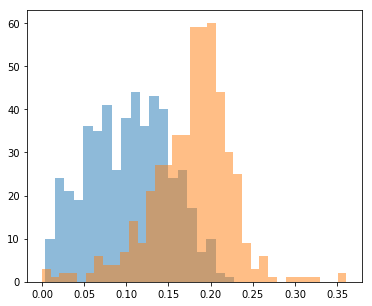

In [10]:
figsize(6, 5)
uni2_short = uni_2_psi.loc[uni_2_psi.index[:500]]
uni2_short.columns = uni_true_psi.columns
plt.hist(((uni2_short - uni_true_psi.loc[uni_true_psi.index[:500]])**2).sum(axis=1) / (300-(uni2_short.isna().sum(axis=1))), alpha=0.5, bins=20)
uni2_short = uni_01_psi.loc[uni_2_psi.index[:500]]
uni2_short.columns = uni_true_psi.columns
plt.hist(((uni2_short - uni_true_psi.loc[uni_true_psi.index[:500]])**2).sum(axis=1) / (300-(uni2_short.isna().sum(axis=1))), alpha=0.5, bins=35)

In [84]:
uni2_short = uni_2_psi.loc[uni_2_psi.index[:500]]
uni2_short.columns = uni_true_psi.columns
uni_true_short = uni_true_psi.loc[uni_true_psi.index[:500]]

-0.6657329572991252

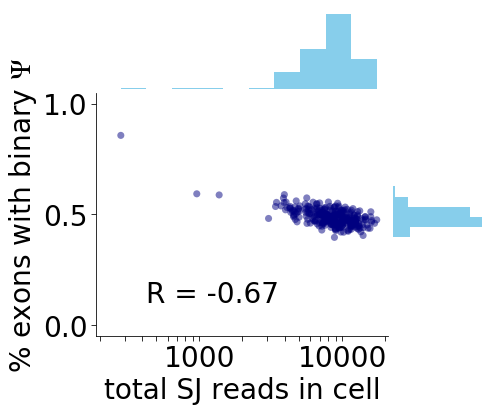

In [26]:
# import importlib
# importlib.reload(scp)

inter = uni_1_psi.iloc[range(500)].index

xlocations = [200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 20000]
xtags = ['', '', '', '', '', '', '', '', '1000', '', '', '', '', '', '', '', '', '10000', '']
scp.plot_cell_expression_v_binary(uni_1_psi.loc[inter], uni_1_counts.loc[inter], 'Unimodal', 
                                  'simulated_unimodal_data_capture_1_intermediate_only',
                                  xlocations = xlocations, xtags=xtags, xlabel='total SJ reads in cell',
#                                   xlabel='total SJ reads in cell',
                                   xlim=(np.log10(190), np.log10(21000)),
                              plot_dir = 'plots', just_show=False)

### Cell SJ reads vs binary observations

-0.6747610035133969

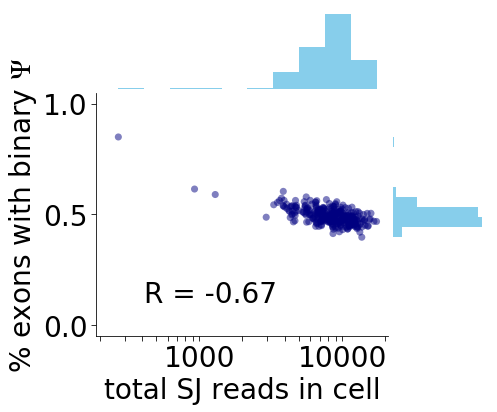

In [24]:
# import importlib
# importlib.reload(scp)

inter = uni_1_psi.loc[(uni_1_psi.mean(axis=1) >= 0.2) & (uni_1_psi.mean(axis=1) <= 0.8)].index

xlocations = [200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 20000]
xtags = ['', '', '', '', '', '', '', '', '1000', '', '', '', '', '', '', '', '', '10000', '']
scp.plot_cell_expression_v_binary(uni_1_psi.loc[inter], uni_1_counts.loc[inter], 'Unimodal', 
                                  'simulated_unimodal_data_capture_1',
                                  xlocations = xlocations, xtags=xtags, xlabel='total SJ reads in cell',
#                                   xlabel='total SJ reads in cell',
                                   xlim=(np.log10(190), np.log10(21000)),
                              plot_dir = 'plots', just_show=False)

-0.7274746471953891

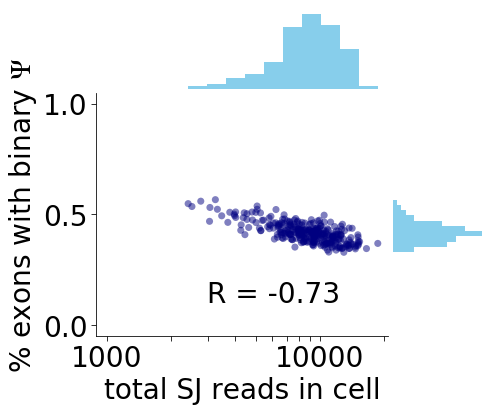

In [23]:
# import importlib
# importlib.reload(scp)

inter = uni_2_psi.loc[(uni_2_psi.mean(axis=1) >= 0.2) & (uni_2_psi.mean(axis=1) <= 0.8)].index

xlocations = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 20000]
xtags = ['1000', '', '', '', '', '', '', '', '', '10000', '']
scp.plot_cell_expression_v_binary(uni_2_psi.loc[inter], uni_2_counts.loc[inter], 'Unimodal', 
                                  'simulated_unimodal_data_capture_25',
                                  xlocations = xlocations, xtags=xtags, xlabel='total SJ reads in cell',
#                                   xlabel='total SJ reads in cell',
                                  xlim=(2.95, np.log10(21000)),
                                   
                              plot_dir = 'plots', just_show=False)

-0.17903660610502783

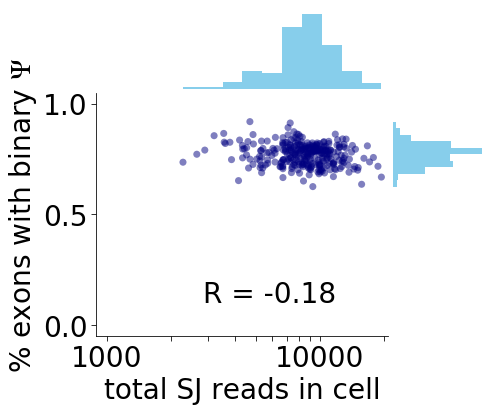

In [25]:
# import importlib
# importlib.reload(scp)

inter = uni_01_psi.loc[(uni_01_psi.mean(axis=1) >= 0.2) & (uni_01_psi.mean(axis=1) <= 0.8)].index

xlocations = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 20000]
xtags = ['1000', '', '', '', '', '', '', '', '', '10000', '']
scp.plot_cell_expression_v_binary(uni_01_psi.loc[inter], uni_01_counts.loc[inter], 'Unimodal', 
                                  'simulated_unimodal_data_capture_01',
                                  xlocations = xlocations, xtags=xtags, xlabel='total SJ reads in cell',
#                                   xlabel='total SJ reads in cell',
                                  xlim=(2.95, np.log10(21000)),
                                   
                              plot_dir = 'plots', just_show=False)

-0.8242233785485222

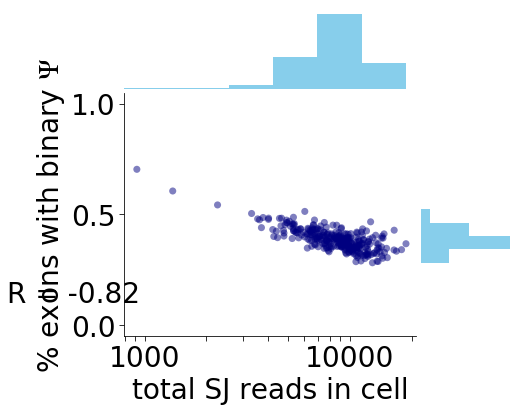

In [30]:
# import importlib
# importlib.reload(scp)

inter = uni_5_psi.loc[(uni_5_psi.mean(axis=1) >= 0.2) & (uni_5_psi.mean(axis=1) <= 0.8)].index

xlocations = [800, 900, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 20000]
xtags = ['', '', '1000', '', '', '', '', '', '', '', '', '10000', '']
scp.plot_cell_expression_v_binary(uni_5_psi.loc[inter], uni_5_counts.loc[inter], 'Unimodal', 
                                  'simulated_unimodal_data_capture_5',
                                  xlocations = xlocations, xtags=xtags, xlabel='total SJ reads in cell',
#                                   xlabel='total SJ reads in cell',
                                  xlim=(2.9, np.log10(21000)),
                                   
                              plot_dir = 'plots', just_show=False)

### Exon SJ v binary observations

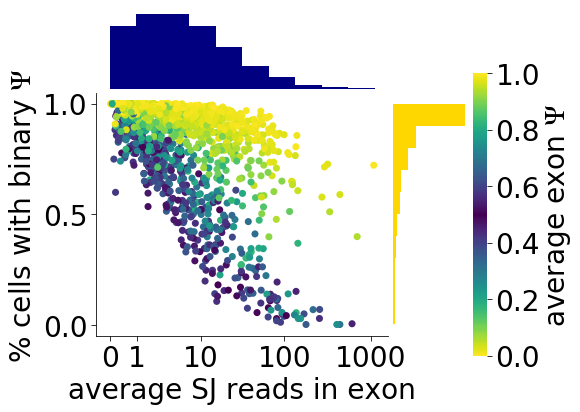

In [38]:
# import importlib
# importlib.reload(scp)
# importlib.reload(spu)
# sns.reset_orig()
# mpl.rcParams["mathtext.fontset"] = "stix"

# figsize(13, 12)

xlocations=[0, 1, 10, 100, 1000]
#xtags = ['25', '50', '100', '200', '400', '800']
scp.plot_ase_expression_v_binary(uni_1_psi, uni_1_counts, 'Unimodal', 'unimodal_simulation_capture_1', xlocations=xlocations,
                                 xlabel='average SJ reads in exon',
                              plot_dir = 'plots', just_show=False)

plt.show()

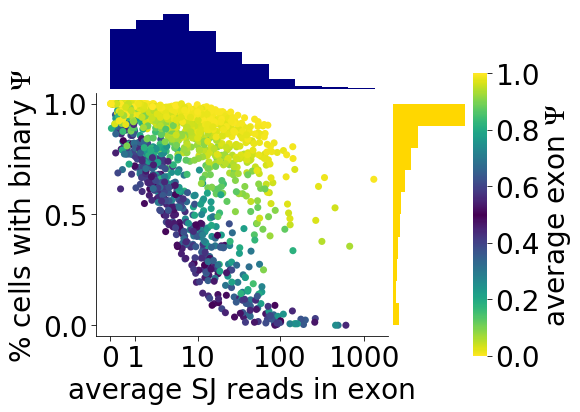

In [39]:
# import importlib
# importlib.reload(scp)
# importlib.reload(spu)
# sns.reset_orig()
# mpl.rcParams["mathtext.fontset"] = "stix"

# figsize(13, 12)

xlocations=[0, 1, 10, 100, 1000]
#xtags = ['25', '50', '100', '200', '400', '800']
scp.plot_ase_expression_v_binary(uni_2_psi, uni_2_counts, 'Unimodal', 'unimodal_simulation_capture_25', xlocations=xlocations,
                                 xlabel='average SJ reads in exon',
                              plot_dir = 'plots', just_show=False)

plt.show()

# Simulations with bimodal underlying $\Psi$

To get the tables in sim1, run the Rscript sim_realistic_data.R

In [28]:
bim_true_counts, bim_true_psi = spu.process_symsim_true('sim1/bimodal_true.tab')
bim_2_counts, bim_2_psi = spu.process_symsim_observed('sim1/bimodal_observed_2.tab', gene_len)
bim_1_counts, bim_1_psi = spu.process_symsim_observed('sim1/bimodal_observed_1.tab', gene_len)
bim_05_counts, bim_05_psi = spu.process_symsim_observed('sim1/bimodal_observed_05.tab', gene_len)
bim_02_counts, bim_02_psi = spu.process_symsim_observed('sim1/bimodal_observed_02.tab', gene_len)
bim_01_counts, bim_01_psi = spu.process_symsim_observed('sim1/bimodal_observed_01.tab', gene_len)

In [35]:
sort_bim_expression = bim_true_counts.mean(axis=1).sort_values().index
bins_bim_true = scp.get_bins_table(bim_true_psi, bim_true_counts)
bins_bim_2 = scp.get_bins_table(bim_2_psi, bim_true_counts)
bins_bim_1 = scp.get_bins_table(bim_1_psi, bim_true_counts)
bins_bim_05 = scp.get_bins_table(bim_05_psi, bim_true_counts)
bins_bim_02 = scp.get_bins_table(bim_02_psi, bim_true_counts)
bins_bim_01 = scp.get_bins_table(bim_01_psi, bim_true_counts)

### All simulated exons

In [36]:
# import importlib
# importlib.reload(scp)
# importlib.reload(spu)
# sns.reset_orig()
# mpl.rcParams["mathtext.fontset"] = "stix"
hist_list = [bins_bim_true[0], bins_bim_2[0], bins_bim_1[0], bins_bim_05[0], bins_bim_02[0], bins_bim_01[0]]
dset_name_list = ["True $\Psi$", "Capture = 0.25", "Capture = 0.1", "Capture = 0.05", "Capture = 0.02", "Capture = 0.01"]

# scp.plot_histograms(hist_list, dset_name_list, fig_len=10, fig_height = 10, ypos1=0.025, ypos2 = 0.625,
#                     plot_dir = 'plots', plot_name = 'sim7_bimodal',
#                     plot_title = "", 
#                     ylab='Simulated exons', ls=12, sk=1.65, tfs=14, name_size=15)

### Intermediate exons

/mnt/lareaulab/cfbuenabadn/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


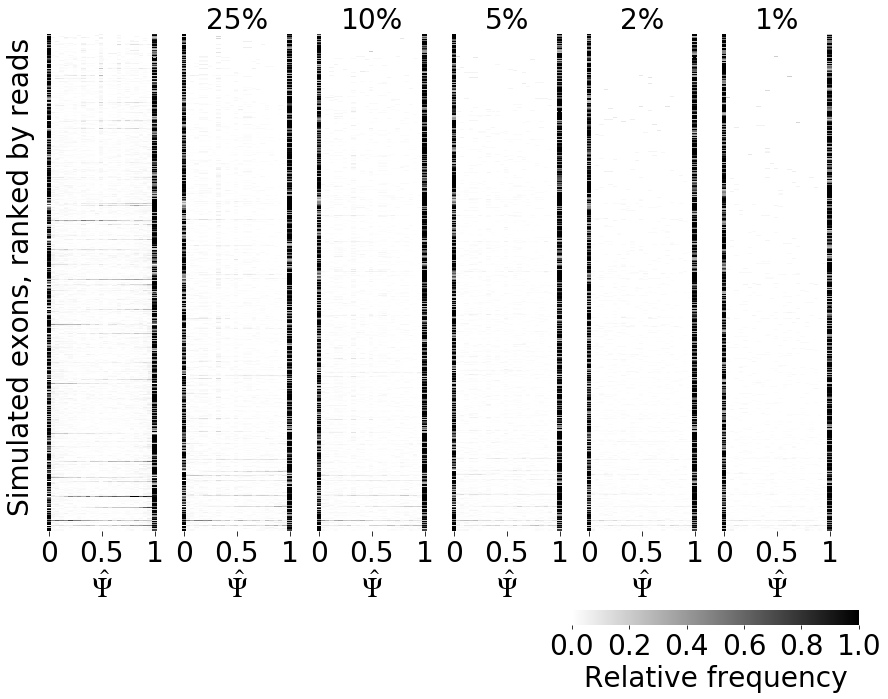

In [37]:
# import importlib
# importlib.reload(scp)
# importlib.reload(spu)
# sns.reset_orig()
# mpl.rcParams["mathtext.fontset"] = "stix"
hist_list = [bins_bim_true[1], bins_bim_2[1], bins_bim_1[1], bins_bim_05[1], bins_bim_02[1], bins_bim_01[1]]
dset_name_list = ["", "25%", "10%", "5%", "2%", "1%"]

scp.plot_histograms(hist_list, dset_name_list, fig_len=10, fig_height = 12, ypos1=0.025, ypos2 = 0.625,
                    plot_dir = 'plots/', plot_name = 'sim7_bimodal_intermediate',
                    plot_title = "", 
                    ylab='Simulated exons, ranked by reads', ls=28, sk=3, tfs=20, name_size=28)




-0.4460629924698946

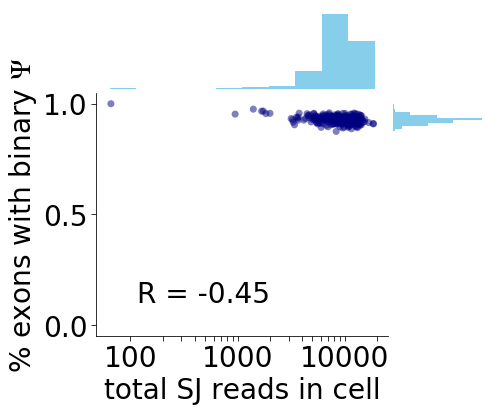

In [29]:
inter = uni_1_psi.iloc[range(500)].index
xlocations = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 20000]
#xtags = ['0.1', '1', '10']
scp.plot_cell_expression_v_binary(bim_1_psi.loc[inter], bim_1_counts.loc[inter], 'Bimodal', 
                                  'simulated_bimodal_data_intermediate_capture_1_intermediate_only', 
                              xlocations = xlocations, xlabel='total SJ reads in cell',#xlocations=[100, 1000, 10000],
                                  xtags=['100','','', '', '', '', '', '', '', '1000', '', '', '', '', '', '', '', '', '10000', ''],
                                  #xlim=(np.log10(290), np.log10(11000)),
                                  plot_dir = 'plots', just_show=False)

-0.5020032221768063

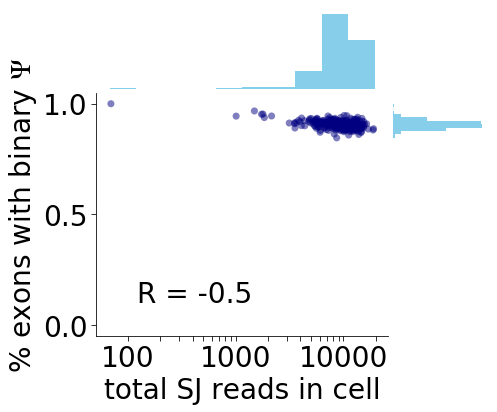

In [49]:
inter = uni_1_psi.loc[(bim_1_psi.mean(axis=1) >= 0.2) & (bim_1_psi.mean(axis=1) <= 0.8)].index
xlocations = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 20000]
#xtags = ['0.1', '1', '10']
scp.plot_cell_expression_v_binary(bim_1_psi.loc[inter], bim_1_counts.loc[inter], 'Bimodal', 
                                  'simulated_bimodal_data_intermediate_capture_1', 
                              xlocations = xlocations, xlabel='total SJ reads in cell',#xlocations=[100, 1000, 10000],
                                  xtags=['100','','', '', '', '', '', '', '', '1000', '', '', '', '', '', '', '', '', '10000', ''],
                                  #xlim=(np.log10(290), np.log10(11000)),
                                  plot_dir = 'plots', just_show=False)

-0.4210181906585267

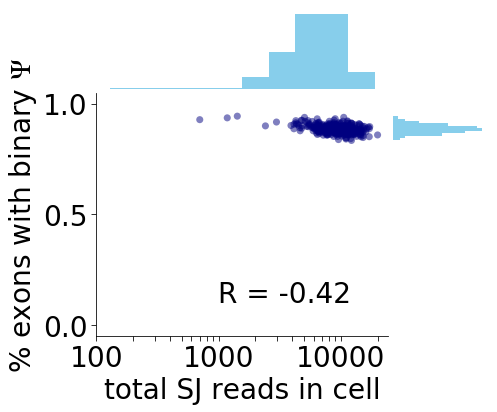

In [48]:
inter = uni_2_psi.loc[(bim_2_psi.mean(axis=1) >= 0.2) & (bim_2_psi.mean(axis=1) <= 0.8)].index
xlocations = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 20000]
#xtags = ['0.1', '1', '10']
scp.plot_cell_expression_v_binary(bim_2_psi.loc[inter], bim_2_counts.loc[inter], 'Bimodal', 
                                  'simulated_bimodal_data_intermediate_capture_25', 
                              xlocations = xlocations, xlabel='total SJ reads in cell',#xlocations=[100, 1000, 10000],
                                  xtags=['100','','', '', '', '', '', '', '', '1000', '', '', '', '', '', '', '', '', '10000', ''],
                                  #xlim=(np.log10(290), np.log10(11000)),
                                  plot_dir = 'plots', just_show=False)

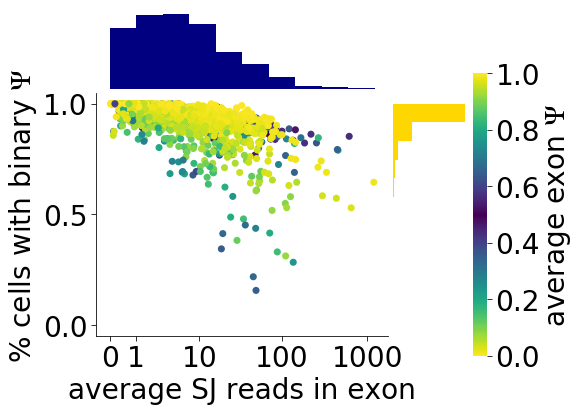

In [45]:
# import importlib
# importlib.reload(scp)
# importlib.reload(spu)
# sns.reset_orig()
# mpl.rcParams["mathtext.fontset"] = "stix"

# figsize(13, 12)

xlocations=[0, 1, 10, 100, 1000]
#xtags = ['25', '50', '100', '200', '400', '800']
scp.plot_ase_expression_v_binary(bim_1_psi, bim_1_counts, 'Bimodal', 'bimodal_simulation_capture_1', xlocations=xlocations,
                                 xlabel='average SJ reads in exon',
                              plot_dir = 'plots', just_show=False)

plt.show()

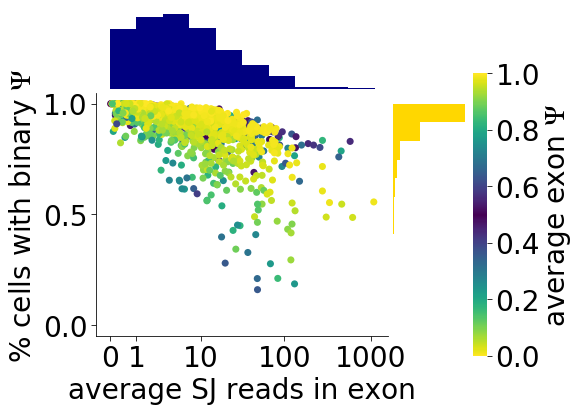

In [47]:
# import importlib
# importlib.reload(scp)
# importlib.reload(spu)
# sns.reset_orig()
# mpl.rcParams["mathtext.fontset"] = "stix"

# figsize(13, 12)

xlocations=[0, 1, 10, 100, 1000]
#xtags = ['25', '50', '100', '200', '400', '800']
scp.plot_ase_expression_v_binary(bim_2_psi, bim_2_counts, 'Bimodal', 'bimodal_simulation_capture_25', xlocations=xlocations,
                                 xlabel='average SJ reads in exon',
                              plot_dir = 'plots', just_show=False)

plt.show()

In [50]:
uni_1_psi_int = uni_1_psi.loc[(uni_1_psi.mean(axis=1) >= 0.2) & (uni_1_psi.mean(axis=1) <= 0.8)]
uni_05_psi_int = uni_05_psi.loc[(uni_05_psi.mean(axis=1) >= 0.2) & (uni_05_psi.mean(axis=1) <= 0.8)]
uni_02_psi_int = uni_02_psi.loc[(uni_02_psi.mean(axis=1) >= 0.2) & (uni_02_psi.mean(axis=1) <= 0.8)]
uni_01_psi_int = uni_01_psi.loc[(uni_01_psi.mean(axis=1) >= 0.2) & (uni_01_psi.mean(axis=1) <= 0.8)]

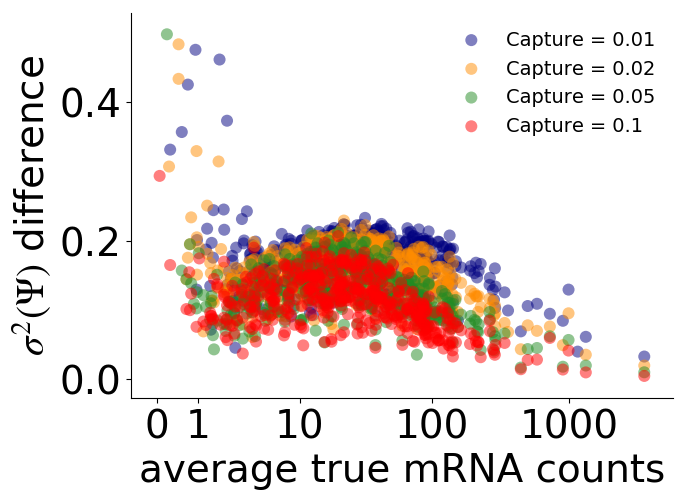

In [51]:
import importlib
importlib.reload(scp)
importlib.reload(spu)
sns.reset_orig()
mpl.rcParams["mathtext.fontset"] = "stix"
# mpl.rcParams['pdf.fonttype'] = 42


fig = plt.figure(figsize=(7,5))

ax  = plt.subplot(1,1,1)



plt.scatter(np.log10(uni_true_counts.loc[uni_01_psi_int.index].mean(axis=1)+1),
    (np.abs(uni_01_psi_int.var(axis=1) - uni_true_psi.loc[uni_01_psi_int.index].var(axis=1))), 
            c='navy', alpha=0.5, label = 'Capture = 0.01', s=75, edgecolors='none')

plt.scatter(np.log10(uni_true_counts.loc[uni_02_psi_int.index].mean(axis=1)+1),
    (np.abs(uni_02_psi_int.var(axis=1) - uni_true_psi.loc[uni_02_psi_int.index].var(axis=1))), 
            c='darkorange', alpha=0.5, label = 'Capture = 0.02', s=75, edgecolors='none')

plt.scatter(np.log10(uni_true_counts.loc[uni_05_psi_int.index].mean(axis=1)+1),
    (np.abs(uni_05_psi_int.var(axis=1) - uni_true_psi.loc[uni_05_psi_int.index].var(axis=1))), 
            c='forestgreen', alpha=0.5, label = 'Capture = 0.05', s=75, edgecolors='none')

plt.scatter(np.log10(uni_true_counts.loc[uni_1_psi_int.index].mean(axis=1)+1), 
            (np.abs(uni_1_psi_int.var(axis=1) - uni_true_psi.loc[uni_1_psi_int.index].var(axis=1))), 
            c='red', alpha=0.5, label = 'Capture = 0.1', s=75, edgecolors='none')



plt.xlabel('average true mRNA counts', fontsize=28)
plt.ylabel('$\sigma^2(\Psi)$ difference', fontsize=28)

plt.legend(frameon=False,  prop={'size': 14})

ax.tick_params(labelsize=28)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
# ax.spines['left'].set_linewidth(2)
# ax.spines['bottom'].set_linewidth(2)

# ax.xaxis.set_tick_params(width=2)
# ax.yaxis.set_tick_params(width=2)

xlocations = [0, 1, 10, 100, 1000]
xlocs = np.array([np.log10(x+1) for x in xlocations])
xtags = [str(i) for i in xlocations]
plt.xticks(xlocs, xtags)

plt.savefig('plots/beta_unif_unimodal_int_variance_diff.svg', bbox_inches='tight', transparent=True)
plt.savefig('plots/beta_unif_unimodal_int_variance_diff.pdf', bbox_inches='tight', transparent=True)
plt.savefig('plots/beta_unif_unimodal_int_variance_diff.png', bbox_inches='tight', transparent=True)

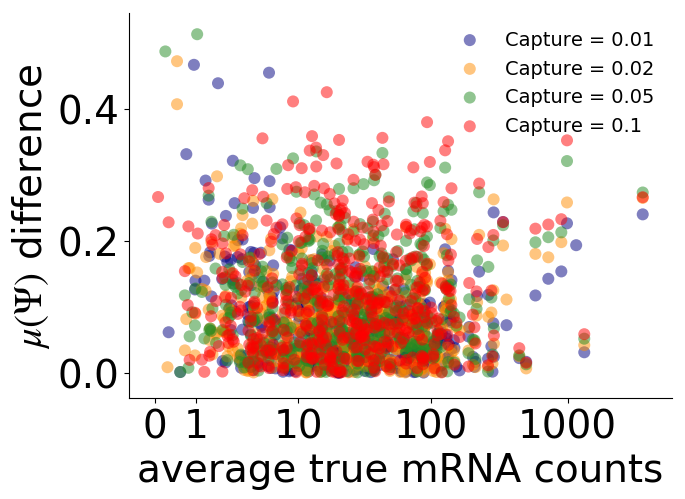

In [52]:
fig = plt.figure(figsize=(7,5))

ax  = plt.subplot(1,1,1)

plt.scatter(np.log10(uni_true_counts.loc[uni_01_psi_int.index].mean(axis=1)+1),
    (np.abs(uni_01_psi_int.mean(axis=1) - uni_true_psi.loc[uni_01_psi_int.index].mean(axis=1))), 
            c='navy', alpha=0.5, label = 'Capture = 0.01', s=75, edgecolors='none')

plt.scatter(np.log10(uni_true_counts.loc[uni_02_psi_int.index].mean(axis=1)+1),
    (np.abs(uni_02_psi_int.mean(axis=1) - uni_true_psi.loc[uni_02_psi_int.index].mean(axis=1))), 
            c='darkorange', alpha=0.5, label = 'Capture = 0.02', s=75, edgecolors='none')

plt.scatter(np.log10(uni_true_counts.loc[uni_05_psi_int.index].mean(axis=1)+1),
    (np.abs(uni_05_psi_int.mean(axis=1) - uni_true_psi.loc[uni_05_psi_int.index].mean(axis=1))), 
            c='forestgreen', alpha=0.5, label = 'Capture = 0.05', s=75, edgecolors='none')

plt.scatter(np.log10(uni_true_counts.loc[uni_1_psi_int.index].mean(axis=1)+1), 
            (np.abs(uni_1_psi_int.mean(axis=1) - uni_true_psi.loc[uni_1_psi_int.index].mean(axis=1))), 
            c='red', alpha=0.5, label = 'Capture = 0.1', s=75, edgecolors='none')


plt.legend(frameon=False,  prop={'size': 14})

ax.tick_params(labelsize=28)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
# ax.spines['left'].set_linewidth(2)
# ax.spines['bottom'].set_linewidth(2)

# ax.xaxis.set_tick_params(width=2)
# ax.yaxis.set_tick_params(width=2)

plt.xlabel('average true mRNA counts', fontsize=28)
plt.ylabel('$\mu(\Psi)$ difference', fontsize=28)

xlocations = [0, 1, 10, 100, 1000]
xlocs = np.array([np.log10(x+1) for x in xlocations])
xtags = [str(i) for i in xlocations]
plt.xticks(xlocs, xtags)


plt.savefig('plots/beta_unif_unimodal_int_mean_diff.svg', bbox_inches='tight', transparent=True)
plt.savefig('plots/beta_unif_unimodal_int_mean_diff.pdf', bbox_inches='tight', transparent=True)
plt.savefig('plots/beta_unif_unimodal_int_mean_diff.png', bbox_inches='tight', transparent=True)